# nb005に追加していく

In [481]:
import os

import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import texthero as hero
from texthero import preprocessing

import warnings
warnings.filterwarnings("ignore")


sns.set_style('ticks')

In [482]:
INPUT_DIR = '../data/inputs/'
OUTPUT_DIR = '../data/outputs/'

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [483]:
train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))

In [484]:
# Publicher==Unknownと言う会社はなくて、NaNの入力ミスと仮定
test_df.query('Publisher == "Unknown"').replace('Unknown', np.nan, inplace=True)


In [485]:
whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [486]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,NaN,NaN,NaN,NaN,NaN,NaN
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [487]:
test_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8,19.0,Io Interactive,M
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9,132.0,Crystal Dynamics,T
2,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M
3,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M
4,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M


In [488]:

def _platform_genre(x):
    p = x['Platform'].lower() if x['Platform'] else 'nan'

    judge_g = x['Genre'] if type(x['Genre']) == str else 'nan'
    g = judge_g.lower() if judge_g != 'nan' else 'nan'
    p_and_g = "{}_{}".format(p,g) 
    return p_and_g

test_df['Platform_and_Genre'] = test_df.apply(_platform_genre, axis=1)
train_df['Platform_and_Genre'] = train_df.apply(_platform_genre, axis=1)

test_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_and_Genre
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8,19.0,Io Interactive,M,xb_action
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9,132.0,Crystal Dynamics,T,ps_action
2,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M,xb_action
3,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M,x360_action
4,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M,ps3_action


In [489]:
# ScoreとCountを掛け算してみて影響しないかな

import pandas as pd

train_df['User_Score'] = train_df['User_Score'].replace('tbd', None).astype(float)
test_df['User_Score'] = test_df['User_Score'].replace('tbd', None).astype(float)


# Criticに関して
train_df['Critic_Count_times_Score'] = train_df.apply(lambda x: x['Critic_Count']*x['Critic_Score'], axis=1)
test_df['Critic_Count_times_Score'] = test_df.apply(lambda x: x['Critic_Count']*x['Critic_Score'], axis=1)

# Userに関して
train_df['User_Count_times_Score'] = train_df.apply(lambda x: x['User_Count']*x['User_Score'], axis=1)
test_df['User_Count_times_Score'] = test_df.apply(lambda x: x['User_Count']*x['User_Score'], axis=1)


In [490]:
#


train_df['Divided_Critic_Score'] = train_df.apply(lambda x: x['Critic_Score'] / x['Critic_Count'], axis=1)
train_df['Divided_User_Score'] = train_df.apply(lambda x: x['User_Score'] / x['User_Count'], axis=1)

test_df['Divided_Critic_Score'] = test_df.apply(lambda x: x['Critic_Score'] / x['Critic_Count'], axis=1)
test_df['Divided_User_Score'] = test_df.apply(lambda x: x['User_Score'] / x['User_Count'], axis=1)



In [491]:
# 雑に評論家とユーザーのスコアの乖離度合いを計算する
# CriticScoreは100点満点、UserScoreは10点満点なので、CS - US*10する

train_df['Difference_Between_Critics_And_Users'] = train_df.apply(lambda x: x['Critic_Score'] - x['User_Score']*10, axis=1)
test_df['Difference_Between_Critics_And_Users'] = test_df.apply(lambda x: x['Critic_Score'] - x['User_Score']*10, axis=1)

In [492]:
train_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Platform_and_Genre', 'Critic_Count_times_Score',
       'User_Count_times_Score', 'Divided_Critic_Score', 'Divided_User_Score',
       'Difference_Between_Critics_And_Users'],
      dtype='object')

In [493]:
# 販売年が何年行こうか reportの分布から1990,2000,2010で分けてみる

def _check_year(x):
    if x < 1990:
        return 'A'
    elif x < 2000:
        return 'B'
    elif x < 2010:
        return'C'
    elif x >= 2010:
        return 'D'
    else:
        return 'E'


# tmp_df = train_df.copy()
# tmp_df['Year_category'] = tmp_df['Year_of_Release'].apply(_check_year)
# tmp_df.query('Year_category == "A"')

train_df['Year_category'] = train_df['Year_of_Release'].apply(_check_year)
test_df['Year_category'] = test_df['Year_of_Release'].apply(_check_year)



In [494]:
train_df['Genre'].unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [495]:
# 一杯genreを出している会社は大きいところ？

def _publisher_genre_count(x):
    pub = x['Publisher']
    genre_count = len(whole_df.query('Publisher == @pub')['Genre'].unique())
    return genre_count

train_df['Publisher_Genre_Count'] = train_df.apply(_publisher_genre_count,axis=1)
test_df['Publisher_Genre_Count'] = test_df.apply(_publisher_genre_count,axis=1)

In [496]:
def _publisher_rating_count(x):
    pub = x['Publisher']
    rating_count = len(whole_df.query('Publisher == @pub')['Rating'].unique())
    return rating_count

train_df['Publisher_Rating_Count'] = train_df.apply(_publisher_rating_count,axis=1)
test_df['Publisher_Rating_Count'] = test_df.apply(_publisher_rating_count,axis=1)


In [497]:
# def _publisher_year_of_release_count(x):
#     pub = x['Publisher']
#     year_of_release_count = len(whole_df.query('Publisher == @pub')['Year_of_Release'].unique())
#     return year_of_release_count

# train_df['Publisher_Year_of_Release_Count'] = train_df.apply(_publisher_year_of_release_count,axis=1)
# test_df['Publisher_Year_of_Release_Count'] = test_df.apply(_publisher_year_of_release_count,axis=1)

In [498]:
# def _publisher_platform_count(x):
#     pub = x['Publisher']
#     platform_count = len(whole_df.query('Publisher == @pub')['Platform'].unique())
#     return platform_count

# train_df['Publisher_Platform_Count'] = train_df.apply(_publisher_platform_count,axis=1)
# test_df['Publisher_Platform_Count'] = test_df.apply(_publisher_platform_count,axis=1)

In [499]:
# https://www.guruguru.science/competitions/13/discussions/8c7a3e1b-55f8-4c93-9897-b331346afbfd/
# takabyさんのを参考にKmeansをいれる。PCA入れたら下がったので一旦除外

# カラムを絞る
train_name = train_df[['Name', 'Global_Sales']]
test_name = test_df[['Name']]

# Nameを綺麗にする
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                  ]
train_name['clean_Name'] = hero.clean(train_name['Name'], pipeline=custom_pipeline)
test_name['clean_Name'] = hero.clean(test_name['Name'], pipeline=custom_pipeline)

df_name = pd.concat([train_name, test_name], axis=0, sort=False).reset_index(drop=True)

df_name['kmeans'] = (
    df_name['clean_Name']
    .pipe(hero.tfidf)
    .pipe(hero.kmeans)
)

# 良くなかった
# df_name['pca'] = (
#     df_name['clean_Name']
#     .pipe(hero.tfidf)
#     .pipe(hero.pca)
# )

kmeans_dic = {}
names = df_name['Name'].to_list()
kmeans = df_name['kmeans'].to_list()

for name, kv in zip(names, kmeans):
    # kmeans_dic[name] = {'kmeans': kv, 'pca': p}
    kmeans_dic[name] = kv



train_df['Kmeans'] = train_df['Name'].apply(lambda x : kmeans_dic[x])
test_df['Kmeans'] = test_df['Name'].apply(lambda x : kmeans_dic[x])


# train_df['PCA'] = train_df['Name'].apply(lambda x : kmeans_dic[x]['pca'])
# test_df['PCA'] = test_df['Name'].apply(lambda x : kmeans_dic[x]['pca'])

In [500]:

# tbdの処理でNoneにする
def preprocess(input_df: pd.DataFrame) -> pd.DataFrame:
    output_df = input_df.copy()
    
    idx_tbd = input_df['User_Score'] == 'tbd'
    output_df['User_Score_is_tbd'] = idx_tbd.astype(int)
    
    output_df['User_Score'] = input_df['User_Score'].replace('tbd', None).astype(float)
    return output_df

# 連続変数のコピー
def create_continuous_features(input_df):
    input_df = preprocess(input_df)
    use_columns = [
        # 連続変数
        'Critic_Score',
        'Critic_Count', 
        'User_Score', 
        'User_Count',
        'Year_of_Release',
        'User_Score_is_tbd',
        'User_Count_times_Score',
        'Critic_Count_times_Score',
        'Divided_Critic_Score',
        'Divided_User_Score',
        'Difference_Between_Critics_And_Users',
        'Publisher_Genre_Count',
        'Publisher_Rating_Count'
    ]
    return input_df[use_columns].copy()

In [501]:
def _is_violence(x):
    if type(x) == str:
        if x.lower() in ['m', 'ao']:
            return 'violence'
        else:
            return 'not_violence'
    else:
        return None



train_df['Violence'] = train_df['Rating'].apply(_is_violence)
test_df['Violence'] = test_df['Rating'].apply(_is_violence)

In [502]:
train_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count_times_Score,User_Count_times_Score,Divided_Critic_Score,Divided_User_Score,Difference_Between_Critics_And_Users,Year_category,Publisher_Genre_Count,Publisher_Rating_Count,Kmeans,Violence
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,...,1258.0,173.8,4.352941,0.359091,-5.0,E,9,6,3,not_violence
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151,61,0,21,234,...,1716.0,184.8,3.545455,0.235714,12.0,E,7,4,3,not_violence
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,...,365.0,74.0,14.600000,0.740000,-1.0,E,9,6,3,not_violence
3,Combat,2600,NaN,Action,Atari,117,7,0,1,125,...,NaN,NaN,NaN,NaN,NaN,E,12,5,0,None
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,...,608.0,101.4,9.500000,0.600000,-2.0,E,9,6,0,not_violence


In [503]:
# https://www.guruguru.science/competitions/13/discussions/8c7a3e1b-55f8-4c93-9897-b331346afbfd/
# 同じくtakabyさんのを参考に出現頻度の高い単語でlegoとかsoccerとかでboolean特徴量を作る

# trainとtestに共通してそうな単語
# lego,soccer,super,world,wars,dragon,nba,


def _check_word_in(x, word):
    if type(x) == str:
        if word in x.lower():
            return True
        else:
            return False
    else:
        return False


train_df['Name_in_lego'] = train_df['Name'].apply(lambda x: _check_word_in(x, 'lego'))
train_df['Name_in_soccer'] = train_df['Name'].apply(lambda x: _check_word_in(x, 'soccer'))
train_df['Name_in_super'] = train_df['Name'].apply(lambda x: _check_word_in(x, 'super'))
train_df['Name_in_world'] = train_df['Name'].apply(lambda x: _check_word_in(x, 'world'))
train_df['Name_in_wars'] = train_df['Name'].apply(lambda x: _check_word_in(x, 'wars'))
train_df['Name_in_nba'] = train_df['Name'].apply(lambda x: _check_word_in(x, 'nba'))

test_df['Name_in_lego'] = test_df['Name'].apply(lambda x: _check_word_in(x, 'lego'))
test_df['Name_in_soccer'] = test_df['Name'].apply(lambda x: _check_word_in(x,'soccer'))
test_df['Name_in_super'] = test_df['Name'].apply(lambda x: _check_word_in(x,'super'))
test_df['Name_in_world'] = test_df['Name'].apply(lambda x: _check_word_in(x,'world'))
test_df['Name_in_wars'] = test_df['Name'].apply(lambda x: _check_word_in(x,'wars'))
test_df['Name_in_nba'] = test_df['Name'].apply(lambda x: _check_word_in(x,'nba'))


list_name_in = ['Name_in_lego', 'Name_in_soccer', 'Name_in_super', 'Name_in_world', 'Name_in_wars', 'Name_in_nba']
train_df[list_name_in] = train_df[list_name_in] * 1
test_df[list_name_in] = test_df[list_name_in] * 1


In [504]:
def create_boolean_feature(input_df):
    output_df = pd.DataFrame()
    
    texts = [
        'PS'
    ]
    
    for t in texts:
        output_df[f'Platform_has_{t}'] = input_df['Platform'].fillna('').str.lower().str.contains(t).astype(int)
    return output_df

In [505]:
create_boolean_feature(train_df).sum()

Platform_has_PS    0
dtype: int64

In [506]:
# # https://www.guruguru.science/competitions/13/discussions/4753329b-e3a6-4660-bd7d-e6e777aca9d4/
# # mst8823さんのdisscussを参考に色々足してCEBかOHEする

# # 今回使う関数
# def get_label_by_other_label(train, label_name, label, other_label, weights, weights_method):

#     # label * other_labelの,value_countsしたdfを作成
#     df = train[[other_label, label]]
#     df = df.groupby([label])[other_label].value_counts()
#     df = df.unstack(level=1).fillna(0).T

#     # dfを重みづけ
#     if weights is not None:
#         # label の重みづけ用に
#         weights = train.groupby(other_label, as_index=False).agg({weights:[weights_method]})
#         weights.columns = [other_label, "weights"]
#         # 一応マージして順番を正しくする
#         weights = pd.merge(pd.DataFrame(df.index), weights, on=other_label, how="left")
#         df = df.apply(lambda x:x*weights["weights"].values) # 重みづけ

#     # 特徴量化
#     maker_map = df.idxmax()
#     maker_map = pd.DataFrame(maker_map).reset_index().rename(columns={0:label_name})
#     output_df = pd.merge(train[[label]], maker_map, on=label, how="left")

#     return output_df[[label_name]], maker_map # 見るようにmaker_mapを返してます

In [507]:
# labels = ['Genre', 'Rating', 'Platform', 'Year_of_Release'] # other_labelでラベリングされるラベル
# other_label = "Name"  # labelをラベリングするラベル
# weights = "Global_Sales"  # ラベリングの際の重み
# weights_method = "max"  # 重みの計算方法

# for label in labels:
#     label_name = f"{label}_labeld_Name"
#     _df, name =  get_label_by_other_label(train_df, label_name, label, other_label, weights, weights_method)
#     train_df = pd.merge(train_df, name, how='left')
#     test_df = pd.merge(test_df, name, how='left')

# train_df.head(2)

In [508]:
test_df.head(2)


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,...,Publisher_Genre_Count,Publisher_Rating_Count,Kmeans,Violence,Name_in_lego,Name_in_soccer,Name_in_super,Name_in_world,Name_in_wars,Name_in_nba
0,Hitman 2: Silent Assassin,XB,NaN,Action,Eidos Interactive,84.0,23.0,8.0,19.0,Io Interactive,...,12,5,0,violence,0,0,0,0,0,0
1,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,91.0,17.0,9.0,132.0,Crystal Dynamics,...,12,5,2,not_violence,0,0,0,0,0,0


In [509]:
train_df.head().T

,0,1,2,3,4
Name,LEGO Batman: The Videogame,LEGO Indiana Jones: The Original Adventures,LEGO Batman: The Videogame,Combat,LEGO Harry Potter: Years 5-7
Platform,Wii,Wii,PSP,2600,Wii
Year_of_Release,NaN,NaN,NaN,NaN,NaN
Genre,Action,Action,Action,Action,Action
Publisher,Warner Bros. Interactive Entertainment,LucasArts,Warner Bros. Interactive Entertainment,Atari,Warner Bros. Interactive Entertainment
NA_Sales,180,151,56,117,69
EU_Sales,97,61,44,7,42
JP_Sales,0,0,0,0,0
Other_Sales,28,21,27,1,12
Global_Sales,306,234,128,125,124


# 特徴量生成 from 初心者講座


In [510]:
class BaseBlock(object):
    def fit(self, input_df, y=None):
        return self.transform(input_df)
        
    def transform(self, input_df):
        raise NotImplementedError()

In [511]:
# countEncodign
class CountEncodingBlock(BaseBlock):
    def __init__(self, column, whole_df: pd.DataFrame):
        self.column = column
        self.whole_df = whole_df

    def transform(self, input_df):
        output_df = pd.DataFrame()
        c = self.column
        
        vc = self.whole_df[c].value_counts()
        output_df[c] = input_df[c].map(vc)
        return output_df.add_prefix('CE_')

In [512]:
class OneHotBlock(BaseBlock):
    def __init__(self, column: str):
        self.column = column
        self.cats_ = None
        
    def fit(self, input_df, y=None):
        vc = input_df[self.column].dropna().value_counts()
        cats = vc[vc > 40].index
        self.cats_ = cats
        return self.transform(input_df)
    
    def transform(self, input_df):
        x = pd.Categorical(input_df[self.column], categories=self.cats_)
        out_df = pd.get_dummies(x, dummy_na=False)
        out_df.columns = out_df.columns.tolist()
        return out_df.add_prefix(f'OH_{self.column}=')

In [513]:
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords
                  ]

In [514]:
from nltk.util import ngrams

def line_ngram(line, n=2):
    words = [w for w in line.split(' ') if len(w) != 0] # 空文字は取り除く
    return list(ngrams(words, n))

In [515]:
def clearn_by_hero(x):
    custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords
                  ]
    return hero.clean(x, custom_pipeline)

def create_n_gram(x, n=3):
    x = clearn_by_hero(x)
    x = pd.Series(x).map(lambda r: line_ngram(r, n=n))
    return x

class NameNGramBlock(BaseBlock):
    def __init__(self, whole_df, n=3):
        self.whole_df = whole_df
        self.n = n
    
    def fit(self, input_df, y=None):
        name_grams = create_n_gram(self.whole_df['Name'], n=self.n)
        grams = [x for row in name_grams for x in row if len(x) > 0]
        top_grams = pd.Series(grams).value_counts().head(20).index
        
        self.top_grams_ = top_grams
        return self.transform(input_df)
    
    def transform(self, input_df):
        name_grams = create_n_gram(input_df['Name'], n=self.n)
        output_df = pd.DataFrame()
        
        for top in self.top_grams_:
            s_top = '-'.join(top)
            output_df[f'{s_top}'] = name_grams.map(lambda x: top in x).map(int)

        return output_df.add_prefix('Name_has_').add_suffix(f'_n={self.n}')

In [516]:
sales_columns = train_df.columns[train_df.columns.str.contains('Sales')].tolist()
sales_columns = sorted(sales_columns)

class SalesPortfolioBlock(BaseBlock):
    """売上ポートフォリオ"""
    
    def __init__(self, key: str):
        self.key = key    
        self.meta_df = None
    
    def fit(self, input_df):
        _df = input_df[sales_columns].groupby(input_df[self.key]).sum()
        _df = (_df.T / _df.sum(axis=1)).T
        self.meta_df = _df
        return self.transform(input_df)
    
    def transform(self, input_df):
        out_df = pd.merge(input_df[self.key], self.meta_df, on=self.key, how='left').drop(columns=[self.key])
        out_df = out_df.add_prefix(f'SP@{self.key}_')
        return out_df

In [517]:
class WrapperBlock(BaseBlock):
    def __init__(self, function):
        self.function = function
        
    def transform(self, input_df):
        return self.function(input_df)

In [518]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

@contextmanager
def timer(logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None):
    if prefix: format_str = str(prefix) + format_str
    if suffix: format_str = format_str + str(suffix)
    start = time()
    yield
    d = time() - start
    out_str = format_str.format(d)
    if logger:
        logger.info(out_str)
    else:
        print(out_str)

In [519]:
whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [520]:

ohb_list = ['Platform', 'Genre', 'Rating', 'Publisher', 'Kmeans', 'Platform_and_Genre']

ceb_list = ['Name', 'Platform', 'Genre', 'Year_of_Release', 
            'Violence', 'Rating'
            ]

srpb_list = ['Genre', 'Platform', 'Violence', 'Rating', 'Kmeans']

process_blocks = [
    WrapperBlock(create_continuous_features),
    # WrapperBlock(_categolize_year),
    # WrapperBlock(create_boolean_feature),
    NameNGramBlock(whole_df, n=3),
    *[OneHotBlock(c) for c in ohb_list],
    *[CountEncodingBlock(c, whole_df=whole_df) for c in ceb_list],
    *[SalesPortfolioBlock(c) for c in srpb_list]
]

In [521]:
process_blocks

In [522]:
from tqdm import tqdm


def get_function(block, is_train):
    s = mapping = {
        True: 'fit',
        False: 'transform'
    }.get(is_train)
    return getattr(block, s)
    

def to_feature(input_df, 
               blocks,
               is_train=False):
    out_df = pd.DataFrame()
    
    for block in tqdm(blocks, total=len(blocks)):
        func = get_function(block, is_train)
        
        with timer(prefix='create ' + str(block) + ' '):
            _df = func(input_df)
        
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [523]:
train_feat_df = to_feature(train_df, process_blocks, is_train=True)
test_feat_df = to_feature(test_df, process_blocks)

 58%|█████▊    | 11/19 [00:01<00:03,  2.32it/s]create <__main__.NameNGramBlock object at 0x133235d60> 1.203[s]
create <__main__.OneHotBlock object at 0x134184910> 0.006[s]
create <__main__.OneHotBlock object at 0x134184e50> 0.005[s]
create <__main__.OneHotBlock object at 0x134184af0> 0.006[s]
create <__main__.OneHotBlock object at 0x134184a30> 0.005[s]
create <__main__.OneHotBlock object at 0x134184280> 0.002[s]
create <__main__.OneHotBlock object at 0x134184b80> 0.010[s]
create <__main__.CountEncodingBlock object at 0x1341846d0> 0.014[s]
create <__main__.CountEncodingBlock object at 0x134184040> 0.006[s]
create <__main__.CountEncodingBlock object at 0x134184250> 0.006[s]
create <__main__.CountEncodingBlock object at 0x134184fa0> 0.005[s]
create <__main__.CountEncodingBlock object at 0x134184640> 0.007[s]
create <__main__.CountEncodingBlock object at 0x134184a00> 0.005[s]
create <__main__.SalesPortfolioBlock object at 0x134184700> 0.010[s]
create <__main__.SalesPortfolioBlock object at

In [524]:
train_feat_df.head()

,Critic_Score,Critic_Count,User_Score,User_Count,Year_of_Release,User_Score_is_tbd,User_Count_times_Score,Critic_Count_times_Score,Divided_Critic_Score,Divided_User_Score,...,SP@Rating_EU_Sales,SP@Rating_Global_Sales,SP@Rating_JP_Sales,SP@Rating_NA_Sales,SP@Rating_Other_Sales,SP@Kmeans_EU_Sales,SP@Kmeans_Global_Sales,SP@Kmeans_JP_Sales,SP@Kmeans_NA_Sales,SP@Kmeans_Other_Sales
0,74.0,17.0,7.9,22.0,NaN,0,173.8,1258.0,4.352941,0.359091,...,0.137876,0.499952,0.048363,0.257305,0.056503,0.138989,0.500085,0.033620,0.276599,0.050707
1,78.0,22.0,6.6,28.0,NaN,0,184.8,1716.0,3.545455,0.235714,...,0.137876,0.499952,0.048363,0.257305,0.056503,0.138989,0.500085,0.033620,0.276599,0.050707
2,73.0,5.0,7.4,10.0,NaN,0,74.0,365.0,14.600000,0.740000,...,0.137876,0.499952,0.048363,0.257305,0.056503,0.138989,0.500085,0.033620,0.276599,0.050707
3,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.125646,0.500131,0.095958,0.238189,0.040077
4,76.0,8.0,7.8,13.0,NaN,0,101.4,608.0,9.500000,0.600000,...,0.137876,0.499952,0.048363,0.257305,0.056503,0.125646,0.500131,0.095958,0.238189,0.040077


# LightGBMによる学習

In [525]:
import lightgbm as lgbm
import xgboost as xgb

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, 
             y, 
             cv, 
             params: dict=None, 
             verbose: int=50):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""
    metric_func = mean_squared_error
    
    # パラメータがないときは、空の dict で置き換える
    if params is None:
        params = {}

    models = []
    scores = []
    # training data の target と同じだけのゼロ配列を用意
    # float にしないと悲しい事件が起こるのでそこだけ注意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with timer(prefix='fit fold={} '.format(i + 1)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    early_stopping_rounds=verbose,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        scores.append(metric_func(y_valid, pred_i) ** .5)

        print(f'Fold {i} RMSLE: {metric_func(y_valid, pred_i) ** .5:.4f}')

    score = metric_func(y, oof_pred) ** .5
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models, scores

In [526]:
params = {
    'objective': 'rmse', # 目的関数. これの意味で最小となるようなパラメータを探します. 
    'learning_rate': .1, # 学習率. 小さいほどなめらかな決定境界が作られて性能向上に繋がる場合が多いです、がそれだけ木を作るため学習に時間がかかります
    'max_depth': 6, # 木の深さ. 深い木を許容するほどより複雑な交互作用を考慮するようになります
    'n_estimators': 10000, # 木の最大数. early_stopping という枠組みで木の数は制御されるようにしていますのでとても大きい値を指定しておきます.
    'colsample_bytree': .5, # 木を作る際に考慮する特徴量の割合. 1以下を指定すると特徴をランダムに欠落させます。小さくすることで, まんべんなく特徴を使うという効果があります.
    'importance_type': 'gain' # 特徴重要度計算のロジック(後述)
}

y = train_df['Global_Sales'].values
y = np.log1p(y) # log + plus1 変換する RMSLEと同じ指標にする小技

In [527]:
from sklearn.model_selection import KFold, GroupKFold

fold = KFold(n_splits=5, shuffle=True, random_state=71)
cv = list(fold.split(train_feat_df, y)) # もともとが generator なため明示的に list に変換する

In [528]:
oof, models, scores = fit_lgbm(train_feat_df.values, y, cv, params=params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.918835
[100]	valid_0's rmse: 0.899813
[150]	valid_0's rmse: 0.896008
[200]	valid_0's rmse: 0.892966
[250]	valid_0's rmse: 0.891957
[300]	valid_0's rmse: 0.891866
Early stopping, best iteration is:
[262]	valid_0's rmse: 0.891087
fit fold=1 0.729[s]
Fold 0 RMSLE: 0.8911
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.935624
[100]	valid_0's rmse: 0.911482
[150]	valid_0's rmse: 0.903562
[200]	valid_0's rmse: 0.899026
[250]	valid_0's rmse: 0.896675
[300]	valid_0's rmse: 0.89475
[350]	valid_0's rmse: 0.893436
[400]	valid_0's rmse: 0.892698
[450]	valid_0's rmse: 0.891818
[500]	valid_0's rmse: 0.892019
Early stopping, be

In [529]:
# Group KFold
def split_by_groups(groups):
    kfold = KFold(n_splits=10, random_state=71, shuffle=True)
    groups = pd.Series(groups)
    
    unique_groups = groups.unique()
    splits = []
    
    def _filter_ids(idx):
        values = unique_groups[idx]
        idx = groups.isin(values)
        return groups[idx].index.values
    
    for idx_tr, idx_val in kfold.split(unique_groups):
        splits.append([
            _filter_ids(idx_tr), _filter_ids(idx_val)
        ])
        
    return splits

In [530]:
cv = split_by_groups(train_df['Genre'])
g_oof, g_models, g_scores = fit_lgbm(train_feat_df.values, y, cv, params=params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1.0282
[100]	valid_0's rmse: 1.01789
[150]	valid_0's rmse: 1.01853
Early stopping, best iteration is:
[119]	valid_0's rmse: 1.01762
fit fold=1 0.514[s]
Fold 0 RMSLE: 1.0176
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1.03556
[100]	valid_0's rmse: 1.02155
[150]	valid_0's rmse: 1.01884
[200]	valid_0's rmse: 1.01561
[250]	valid_0's rmse: 1.01538
[300]	valid_0's rmse: 1.01438
Early stopping, best iteration is:
[282]	valid_0's rmse: 1.01337
fit fold=2 0.478[s]
Fold 1 RMSLE: 1.0134
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training 

In [531]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.
    
    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(max(6, len(order) * .4), 7))
    sns.boxenplot(data=feature_importance_df, x='column', y='feature_importance', order=order, ax=ax, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.grid()
    fig.tight_layout()
    return fig, ax

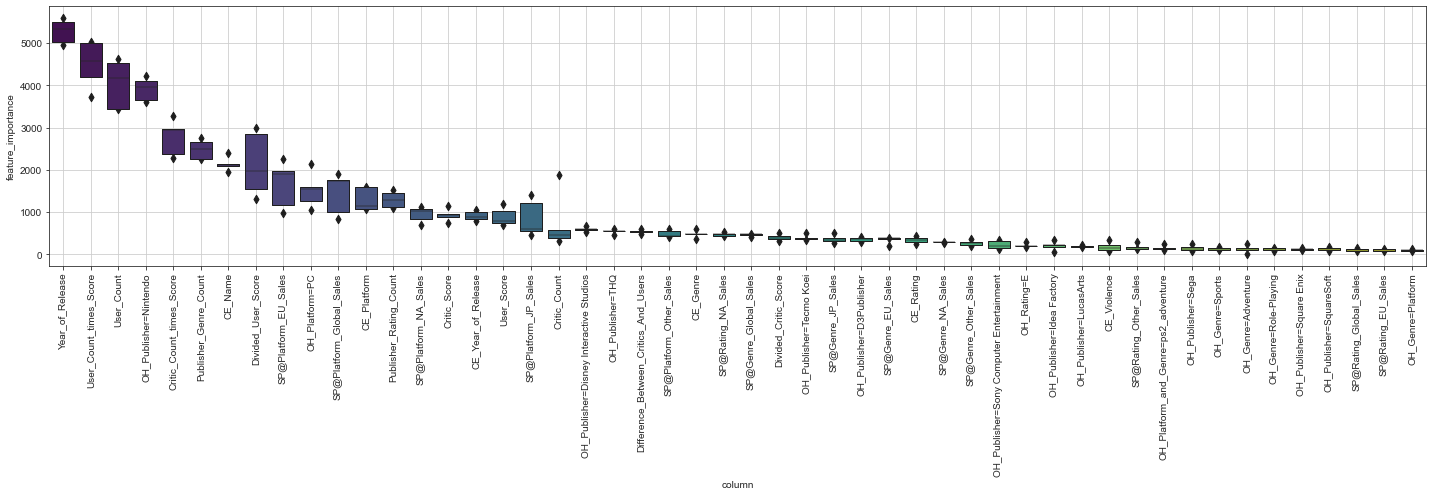

In [532]:
fig, ax = visualize_importance(models, train_feat_df)

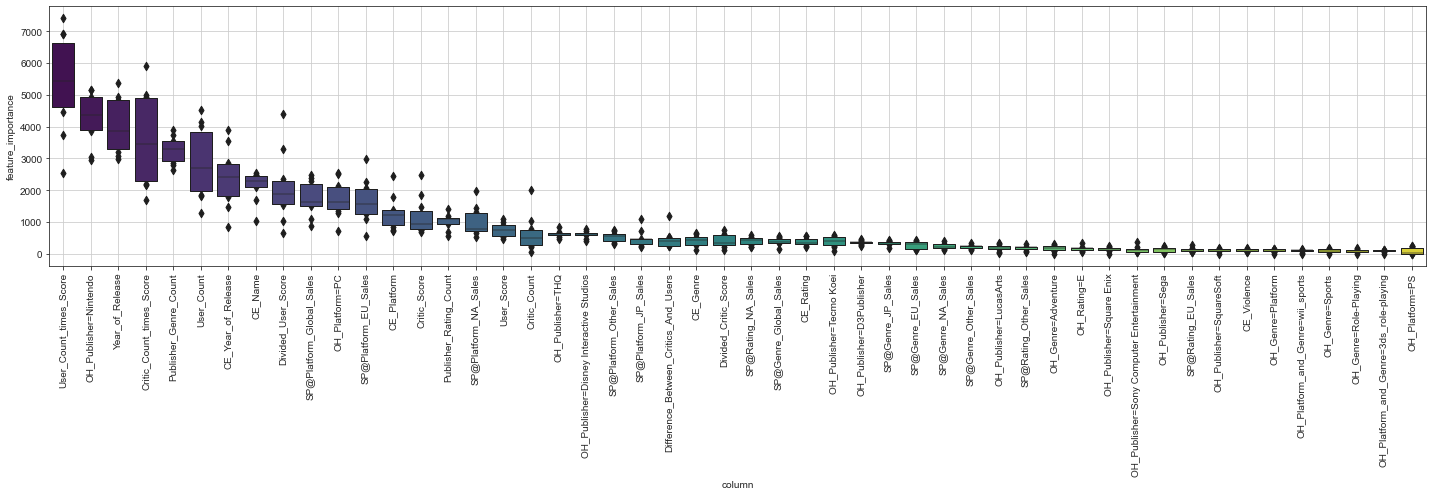

In [533]:
fig, ax = visualize_importance(g_models, train_feat_df)

In [534]:
from datetime import datetime

# file name
now = datetime.now().strftime('%Y%m%d%H%M%S')
sub_file = 'submission_{}.csv'.format(now)
g_sub_file = 'submission_g_{}.csv'.format(now)

#KFold
pred = np.array([model.predict(test_feat_df.values) for model in models])
pred = np.mean(pred, axis=0)
pred = np.expm1(pred)
pred = np.where(pred < 0, 0, pred)
sub_df = pd.DataFrame({ 'Global_Sales': pred })
sub_df.to_csv(os.path.join(OUTPUT_DIR, sub_file), index=False)

#GroupKFold
g_pred = np.array([model.predict(test_feat_df.values) for model in g_models])
g_pred = np.mean(g_pred, axis=0)
g_pred = np.expm1(g_pred)
g_pred = np.where(g_pred < 0, 0, g_pred)
g_sub_df = pd.DataFrame({ 'Global_Sales': g_pred })
g_sub_df.to_csv(os.path.join(OUTPUT_DIR, g_sub_file), index=False)

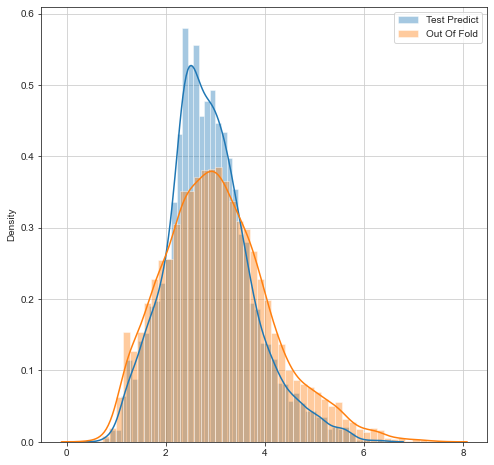

In [535]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(np.log1p(pred), label='Test Predict')
sns.distplot(oof, label='Out Of Fold')
ax.legend()
ax.grid()

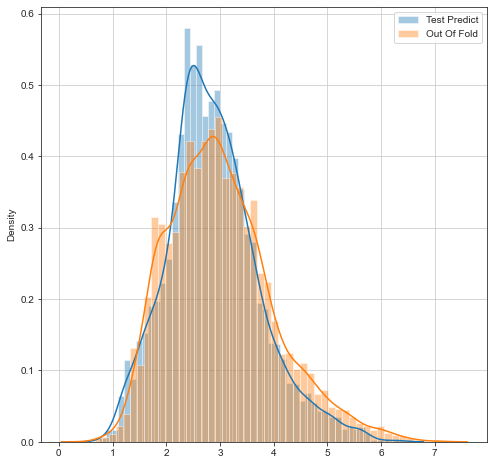

In [536]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(np.log1p(pred), label='Test Predict')
sns.distplot(g_oof, label='Out Of Fold')
ax.legend()
ax.grid()